In [1]:
!pip install missingno lazypredict
!pip install tensorflow



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 62.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 24.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 55.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 6.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 53.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 50.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd


In [39]:
df = pd.read_csv('/workspaces/AMH-proyecto-final_albaebauluz/data/DF_modelos/df_residencial_total_ALBA.csv')

In [40]:
df.head()

,año,fecha,findesemana,festivos,lectivos,covid,tmed,prec,velmedia,poblacion,pib,rentanetamediaporpersona,rentanetamediaporhogar,bono_social,sector_economic,consumo
0,2019.0,2019-01-01,0,1,0,0,8.590909,0.0,1.417647,5628011,62490,14656.0,38386.0,0,Residencial,6713701
1,2019.0,2019-01-02,0,0,0,0,6.617391,0.3,2.152941,5628011,62490,14656.0,38386.0,0,Residencial,7354663
2,2019.0,2019-01-03,0,0,0,0,5.604348,0.1,1.676471,5628011,62490,14656.0,38386.0,0,Residencial,7619413
3,2019.0,2019-01-04,0,0,0,0,5.004348,0.0,1.335294,5628011,63436,14656.0,38386.0,0,Residencial,7815514
4,2019.0,2019-01-05,1,0,0,0,6.173913,0.0,2.247059,5628011,62490,14656.0,38386.0,0,Residencial,7527041


## Paso 1: Preparación de los datos.

In [41]:
df.dtypes

año                         float64
fecha                        object
findesemana                   int64
festivos                      int64
lectivos                      int64
covid                         int64
tmed                        float64
prec                        float64
velmedia                    float64
poblacion                     int64
pib                           int64
rentanetamediaporpersona    float64
rentanetamediaporhogar      float64
bono_social                   int64
sector_economic              object
consumo                       int64
dtype: object

In [42]:
print(df.isnull().sum())

año                         1
fecha                       0
findesemana                 0
festivos                    0
lectivos                    0
covid                       0
tmed                        0
prec                        0
velmedia                    0
poblacion                   0
pib                         0
rentanetamediaporpersona    0
rentanetamediaporhogar      0
bono_social                 0
sector_economic             0
consumo                     0
dtype: int64


In [47]:
df.shape

(1970, 16)

In [48]:
df = df.rename(columns={'Rentanetamediaporhogar': 'renta_hogar'})

## 2. Dividir las variables independientes y la variable dependiente

In [49]:
X = df[['tmed', 'pib']]  # Variables independientes (continuas y dummy)
y = df['consumo']  # Variable dependiente (demanda de electricidad)


## 4. Dividir el conjunto de datos en entrenamiento y prueba

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Escalar las variables continuas

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 6. Definir la arquitectura del modelo

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
# Definir el modelo secuencial
model = Sequential()

# Capa de entrada (input) y capas ocultas
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Capa de salida (una neurona para predicción continua)
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 7. Entrenar el modelo

In [54]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 36654471446528.0000 - val_loss: 38133311733760.0000
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35898930495488.0000 - val_loss: 38133206876160.0000
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36353341390848.0000 - val_loss: 38132804222976.0000
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36625652383744.0000 - val_loss: 38131671760896.0000
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36643377512448.0000 - val_loss: 38129117429760.0000
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36616726904832.0000 - val_loss: 38124205899776.0000
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36545667006464.0000 - val_loss: 38115758571520.0000
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36807102169088.0000 - val_loss: 38102382936064.0000
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36645931843584.0000 - val_loss: 38082552266752.0000
Epoch 10/100


## 8. Evaluar el modelo

In [55]:
test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 807861682176.0000
Test Loss: 877378994176.0


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 584026.7893401015
RMSE: 936685.1009202775


/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 9. Visualizar el progreso del entrenamiento

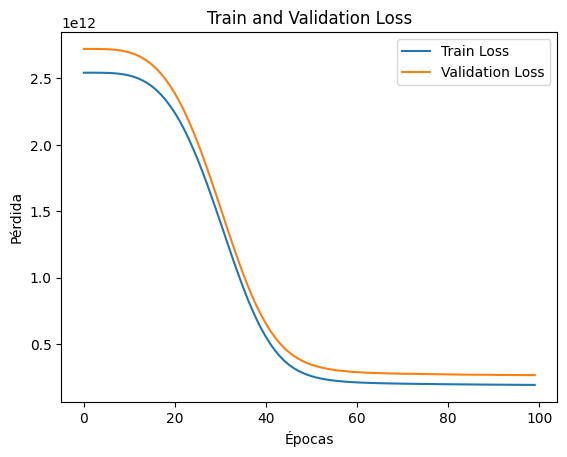

In [17]:
import matplotlib.pyplot as plt

# Graficar el loss durante el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

PRUEBA 1: Tmed

In [30]:
X = df[['tmed']]  # Variables independientes (continuas y dummy)
y = df['consumo']  # Variable dependiente (demanda de electricidad)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Definir el modelo secuencial
model = Sequential()

# Capa de entrada (input) y capas ocultas
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Capa de salida (una neurona para predicción continua)
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

Epoch 1/100


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2604413485056.0000 - val_loss: 2721400487936.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2588717875200.0000 - val_loss: 2721386070016.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2549174501376.0000 - val_loss: 2721317912576.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2519708467200.0000 - val_loss: 2721093779456.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2596577476608.0000 - val_loss: 2720541966336.0000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2520420974592.0000 - val_loss: 2719421300736.0000
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2540074434560.0000 - val_loss: 2717412229120.0000
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2587521974272.0000 - val_loss: 2714191003648.0000
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2528323043328.0000 - val_loss: 2709304115200.0000
Epoch 10/100
41/41 ━━━━━━━━━━━━

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


PRUEBA 2: 'tmed', 'prec', 'velmedia', 'poblacion', 'PIB'

In [31]:

X = df[['tmed', 'prec', 'velmedia', 'poblacion', 'PIB']]  # Variables independientes (continuas y dummy)
y = df['consumo']  # Variable dependiente (demanda de electricidad)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Definir el modelo secuencial
model = Sequential()

# Capa de entrada (input) y capas ocultas
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Capa de salida (una neurona para predicción continua)
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

Epoch 1/100


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2630829473792.0000 - val_loss: 2721393147904.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2489622200320.0000 - val_loss: 2721345961984.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2568909225984.0000 - val_loss: 2721167966208.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2495640502272.0000 - val_loss: 2720646299648.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2528976568320.0000 - val_loss: 2719421562880.0000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2636871106560.0000 - val_loss: 2717016129536.0000
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2564043309056.0000 - val_loss: 2712804786176.0000
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2605433749504.0000 - val_loss: 2706013159424.0000
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2591121211392.0000 - val_loss: 2695811301376.0000
Epoch 10/100
41/41 ━━━━━━━━━━━━

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


PRUEBA 3: Tmed y fecha

In [33]:
# Convertir la columna de fecha a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

In [36]:
import numpy as np

# Asegúrate de que la columna de fecha está en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y')  # Ajusta el formato según tus datos

# Convertir la columna de fecha a timestamp
df['fecha'] = df['fecha'].astype(np.int64) // 10**9  # Convertir a dias

In [38]:
X = df[['tmed']]  # Variables independientes (continuas y dummy)
y = df['consumo']  # Variable dependiente (demanda de electricidad)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Definir el modelo secuencial
model = Sequential()

# Capa de entrada (input) y capas ocultas
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Capa de salida (una neurona para predicción continua)
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

Epoch 1/100


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2593722990592.0000 - val_loss: 2721398128640.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2536688582656.0000 - val_loss: 2721373487104.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2587694465024.0000 - val_loss: 2721266270208.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2556746530816.0000 - val_loss: 2720939376640.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2558993891328.0000 - val_loss: 2720166576128.0000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2531344777216.0000 - val_loss: 2718623334400.0000
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2574563934208.0000 - val_loss: 2715896250368.0000
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2498053537792.0000 - val_loss: 2711507697664.0000
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2507996135424.0000 - val_loss: 2704878075904.0000
Epoch 10/100
41/41 ━━━━━━━━━━━━

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


PRUEBA 4: INDUSTRIAL

In [ ]:
import numpy as np

# Asegúrate de que la columna de fecha está en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y')  # Ajusta el formato según tus datos

# Convertir la columna de fecha a timestamp
df['fecha'] = df['fecha'].astype(np.int64) // 10**9  # Convertir a dias

In [ ]:
X = df[['tmed']]  # Variables independientes (continuas y dummy)
y = df['consumo']  # Variable dependiente (demanda de electricidad)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Definir el modelo secuencial
model = Sequential()

# Capa de entrada (input) y capas ocultas
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Capa de salida (una neurona para predicción continua)
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')